# CÓMPUTO DE ALTO RENDIMIENTO CON LENGUAJES DE ALTO NIVEL

## MINIPROYECTO 2

### Objetivo: 
Utilizar lenjuages de alto rendimiento para evaluar eficienciaal implementar estrategias numéricas para resolver sistemas de ecuaciones lineales.

### Generalidades:

1. Se utilizarán dos lenguajes de alto nivel para este proyecto:  python y julia.


2. Se utilizará material visto en clase para le funcionamiento de algunos métodos de solución de sistemas de ecuaciones lineales e indagar si la implementación impacta en el rendimiento como una necesidad más que una alternativa de programación.


3. Este microproyecto nos acercará a considerar el cómputo de alto rendimiento como una necesidad más que una alternativa de programación.

## 1. Implementación del  método de solución de sistemas de ecuaciones lineales Gradiente conjugado

In [1]:
using LinearAlgebra
using Plots
using BenchmarkTools
using PyCall
using SparseArrays

In [36]:
function gradiente_conjugado(A,b,x0,kn)
    normres_grc = []    
    x = x0
    r = b - A * x
    d = copy(r)
    alfa=10
    for k = 1:kn
        alfa = (r'*r)*(d'*A*d)^(-1)
        x = x + (alfa[1]) * d
        rk = r - alfa[1] * A * d
        beta = (transpose(rk) * rk) * (transpose(r)*r)^(-1)
        dk = rk + beta[1] * d
        r = rk
        d = dk
        normres_grc =[normres_grc;norm(b - A * x)]
    end
    return normres_grc
end


gradiente_conjugado (generic function with 1 method)

## 2. Implementación de la función que construye el sistema de ecuaciones de prueba $Ax = b$

In [2]:
function matriz_dispersa(n)
    e = ones(n)
    n2 =Int(n/2)
    diags = [-1,0,1]
    A = Matrix(spdiagm(-1 => -ones(n-1),0 => 3*ones(n),1 => -ones(n-1)))
    c = spdiagm(0 => ones(n)/2)
    ab = [x for x=1:n]
    ba = [(n+1)-x for x=1:n]
    c = Matrix(permute(c, ba, ab))

    A = A + c
    A[n2+1,n2] = -1
    A[n2,n2+1] = -1
    
    b = zeros(n,1)
    b[1] = 2.5
    b[n] = 2.5
    b[2:n-1] .= [1.5]
    b[n2:n2+1] .= [1]
    x0 = zeros(n) 
    return A,b,x0
end


matriz_dispersa (generic function with 1 method)

## 3. Implementación en Julia y Python de los solvers iterativos Jacobi, Gauss-Seidel, Sobrerelajacion sucesiva, Gradiente Conjugado


### METODOS DE SLUCIÓN DE SISTEMAS DE EACUACIONES LINEALES

### SOLVERS ITERATIVOS (Julia)
Jacobi, Gauss-Seidel, Sobrerelajacion sucesiva, Gradiente Conjugado

Definimos función para metodo de solución iterativo Jacobi

In [26]:
function jacobi_jl(A,b,x0,kn)
    D = Diagonal(A)
    U = triu(A, 1)  
    L = tril(A, -1)
    normres_jacobi = [];
    x = x0
    m = 0
    for k = 1:kn
        x = inv(D)*(b-(L + U)*x);   
        normres_jacobi = [normres_jacobi;norm(b-A*x)];  

        if norm(b-A*x) <= 1e-10
            m = k
            break        
        end
    end     
    return normres_jacobi
end


jacobi_jl (generic function with 1 method)

Definimos función para método de solución iterativo Gass-Seidel

In [27]:
function gauss_seidel_jl(A,b,x0,kn)
    L = tril(A)
    U = triu(A,1)
    x0 = zeros(size(b))
    normres_gauss = [];
    x = x0
    l=0
    for k = 1:kn
    x = inv(L)*(b-U*x);100
    normres_gauss = [normres_gauss;norm(b-A*x)]
        
        if norm(b-A*x) <= 1e-10
            l=k
            break        
        end
    end
    return normres_gauss
end

gauss_seidel_jl (generic function with 1 method)

Definimos función para método de solución iterativo Sobre-relajación sucesiva

In [28]:
function srs_jl(A,b,x0,w,kn)
    U = triu(A,1)
    L = tril(A,-1)
    D = Diagonal(A) 
    normres_srs = []
    x = x0
    l=0
    for k = 1:kn
        x = inv(w * L + D) * ((1 - w) * D * x - (w * U * x)) + (w * inv(D + L * w) * b)
        normres_srs = [normres_srs;norm(b-A*x)]

        if norm(b-A*x) <= 1e-10
            l=k
            break        
        end
    end
    return normres_srs
    
end

srs_jl (generic function with 1 method)

Definimos función para método de solución iterativo Gradiente conjugado

In [29]:
function gradiente_conjugado_jl(A,b,x0,kn)
    normres_grc = []    
    x = x0
    d = r = b - A * x
    for k = 1:kn
        alfa = (transpose(r) * r) / (transpose(d) * A * d)
        x = x + alfa * d
        rk = r - alfa * A * d
        beta = (transpose(rk) * rk) / (transpose(r) * r)
        dk = rk + beta * d
        r = rk
        d = dk
        normres_grc =[normres_grc;norm(b - A * x)]
        if norm(b-A*x) <= 1e-10
            m = k
            break        
        end
    end
    return normres_grc
end

gradiente_conjugado_jl (generic function with 1 method)

Definimos función para que genera las matrices de prueba

In [31]:
function matriz_dispersa_jl(n)
    e = ones(n)
    n2 =Int(n/2)
    diags = [-1,0,1]
    A = Matrix(spdiagm(-1 => -ones(n-1),0 => 3*ones(n),1 => -ones(n-1)))
    c = spdiagm(0 => ones(n)/2)
    ab = [x for x=1:n]
    ba = [(n+1)-x for x=1:n]
    c = Matrix(permute(c, ba, ab))

    A = A + c
    A[n2+1,n2] = -1
    A[n2,n2+1] = -1
    
    b = zeros(n,1)
    b[1] = 2.5
    b[n] = 2.5
    b[2:n-1] .= [1.5]
    b[n2:n2+1] .= [1]
    x0 = zeros(n) 
    return A,b,x0
end


matriz_dispersa_jl (generic function with 1 method)

## SOLVERS ITERATIVOS (Python)
Jacobi, Gauss-Seidel, Sobrerelajacion sucesiva, Gradiente Conjugado

Definimos función para metodo de solución iterativo Jacobi en python

In [32]:
np = pyimport("numpy")
py"""
def jacobi_py(A,b,x0,kn):
    import numpy as np
    D = np.diag(np.diag(A))
    U = np.triu(A, k=1)
    L = np.tril(A, k=-1)
    import numpy as np
    normres_jacobi = []
    x = x0
    m = 0
    for k in range(1,50):
        x = np.dot(  np.linalg.inv(D) , b-( np.dot(L + U,x) ) ) 
        normres_jacobi.append(np.linalg.norm(b-np.dot(A,x)))

    return normres_jacobi
"""
# A,b,x0 = matriz_dispersa(6)
# b =  py"jacobi_py"(A,b,x0,20)

Definimos función para método de solución iterativo Gass-Seidel

In [33]:
py"""
def gauss_seidel_py(A,b,x0,kn):
    normres_gauss_seidel = []
    L = np.tril(A)
    U = np.triu(A, k=1)
    x = x0
    for k in range(1,kn):
        x = np.dot(np.linalg.inv(L) , b - (np.dot( U , x))) 
        normres_gauss_seidel.append(np.linalg.norm(b - np.dot(A,x)))

    return normres_gauss_seidel
"""
# A,b,x0 = matriz_dispersa(6)
# b =  py"gauss_seidel_py"(A,b,x0,20)

Definimos función para método de solución iterativo Sobre-relajación sucesiva

In [34]:
py"""
def srs_py(A,b,x0,kn,w):  
    normres_srs = []
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    D = np.diag(np.diag(A))
    x = x0
    for k in range(1,kn):
        x = np.dot(np.linalg.inv(np.dot(w , L) + D) , (np.dot((1 - w) , np.dot(D , x)) - np.dot(np.dot(w , U) , x))) +  np.dot(np.dot(w , np.linalg.inv(D + np.dot(L , w))) , b)
        normres_srs.append(np.linalg.norm(b - np.dot(A,x)))

    return normres_srs
"""
# w =1.4
# A,b,x0 = matriz_dispersa(6)
# b =  py"srs_py"(A,b,x0,20,w)

Definimos función para método de solución iterativo Gradiente conjugado

In [35]:
py"""
def gradiente_conjugado_py(A,b,x0,kn):
    normres_grc = []
    x = x0
    d = r = b - np.dot(A,x)
    for k in range(1,kn):
        alfa = np.dot(r.transpose(),r) / np.dot(d.transpose(),np.dot(A,d))
        x = x + alfa*d
        rk = r - alfa*np.dot(A,d)
        beta = np.dot(rk.transpose(),rk) / np.dot(r.transpose(),r)
        dk = rk + beta*d
        r = rk
        d = dk
        normres_grc.append(np.linalg.norm(b - np.dot(A,x)))
    return normres_grc
"""
# A,b,x0 = matriz_dispersa(6)
# b =  py"gradiente_conjugado_py"(A,b,x0,20)

## 4. Análisis de convergencia de los cuatro métodos utilizando Julia

Utilizaremos $kn = 20$ iteraciones, junto con un sistema de tamaño $ n ∈ (20,40,50,80,100)$

Convergencia utilizando Jacobi

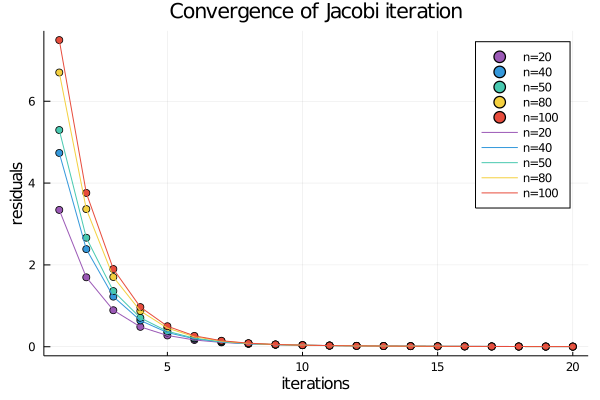

In [71]:
N=[20,40,50,80,100]
kn=length(N)
arrJaconi = []
for i = 1:kn
    n = N[i]
    A,b,x0 = matriz_dispersa(n)
    push!(arrJaconi, jacobi_jl(A,b,x0,20))
end
scatter!(arrJaconi[1],markersize=4, c="#9B59B6",label="n=20" )
scatter!(arrJaconi[2],markersize=4, c="#3498DB",label="n=40" )
scatter!(arrJaconi[3],markersize=4, c="#48C9B0",label="n=50" )
scatter!(arrJaconi[4],markersize=4, c="#F4D03F",label="n=80" )
scatter!(arrJaconi[5],markersize=4, c="#E74C3C",label="n=100")

plot!(arrJaconi[1], c="#9B59B6",label="n=20")
plot!(arrJaconi[2], c="#3498DB",label="n=40" )
plot!(arrJaconi[3], c="#48C9B0",label="n=50" )
plot!(arrJaconi[4], c="#F4D03F",label="n=80" )
plot!(arrJaconi[5], c="#E74C3C",label="n=100" )
plot!(xaxis=("iterations") , yaxis=("residuals"))
plot!(title="Convergence of Jacobi iteration")

Convergencia utilizando Gauss-Seidel

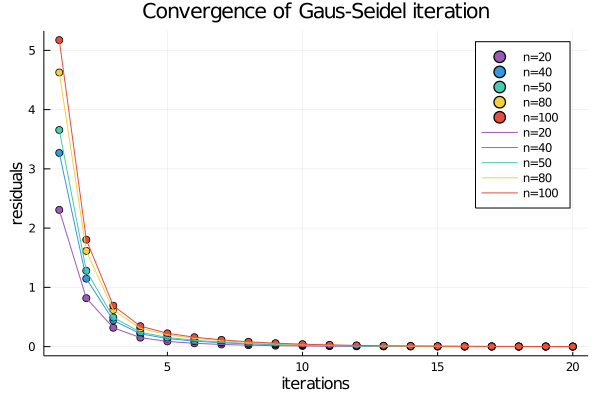

In [81]:
N=[20,40,50,80,100]
kn=length(N)
arrGaussSeidel = []
for i = 1:kn
    n = N[i]
    A,b,x0 = matriz_dispersa(n)
    push!(arrGaussSeidel, gauss_seidel_jl(A,b,x0,20))
end
scatter(arrGaussSeidel[1],markersize=4, c="#9B59B6",label="n=20" )
scatter!(arrGaussSeidel[2],markersize=4, c="#3498DB",label="n=40" )
scatter!(arrGaussSeidel[3],markersize=4, c="#48C9B0",label="n=50" )
scatter!(arrGaussSeidel[4],markersize=4, c="#F4D03F",label="n=80" )
scatter!(arrGaussSeidel[5],markersize=4, c="#E74C3C",label="n=100")

plot!(arrGaussSeidel[1], c="#9B59B6",label="n=20")
plot!(arrGaussSeidel[2], c="#3498DB",label="n=40" )
plot!(arrGaussSeidel[3], c="#48C9B0",label="n=50" )
plot!(arrGaussSeidel[4], c="#F4D03F",label="n=80" )
plot!(arrGaussSeidel[5], c="#E74C3C",label="n=100" )
plot!(xaxis=("iterations") , yaxis=("residuals"))
plot!(title="Convergence of Gaus-Seidel iteration")

Convergencia utilizando Sobre-relajación sucesiva

In [ ]:
N=[20,40,50,80,100]
kn=length(N)
arrSRS = []
for i = 1:kn
    n = N[i]
    A,b,x0 = matriz_dispersa(n)
    push!(arrSRS, gadeuss_seidel_jl(A,b,x0,20))
end
scatter(arrSRS[1],markersize=4, c="#9B59B6",label="n=20" )
scatter!(arrSRS[2],markersize=4, c="#3498DB",label="n=40" )
scatter!(arrSRS[3],markersize=4, c="#48C9B0",label="n=50" )
scatter!(arrSRS[4],markersize=4, c="#F4D03F",label="n=80" )
scatter!(arrSRS[5],markersize=4, c="#E74C3C",label="n=100")

plot!(arrSRS[1], c="#9B59B6",label="n=20")
plot!(arrSRS[2], c="#3498DB",label="n=40" )
plot!(arrSRS[3], c="#48C9B0",label="n=50" )
plot!(arrSRS[4], c="#F4D03F",label="n=80" )
plot!(arrSRS[5], c="#E74C3C",label="n=100" )
plot!(xaxis=("iterations") , yaxis=("residuals"))
plot!(title="Convergence of SRS iteration")

In [1]:
Convergencia utilizando Gradiente Conjugado 

LoadError: [91msyntax: extra token "utilizando" after end of expression[39m

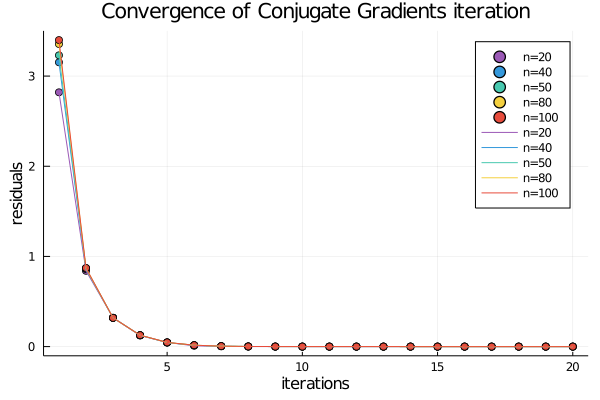

In [25]:
N=[20,40,50,80,100]
kn=length(N)
arrGDC = []
for i = 1:kn
    n = N[i]
    A,b,x0 = matriz_dispersa(n)
    push!(arrGDC, gradiente_conjugado(A,b,x0,20))
end
scatter(arrGDC[1],markersize=4, c="#9B59B6",label="n=20" )
scatter!(arrGDC[2],markersize=4, c="#3498DB",label="n=40" )
scatter!(arrGDC[3],markersize=4, c="#48C9B0",label="n=50" )
scatter!(arrGDC[4],markersize=4, c="#F4D03F",label="n=80" )
scatter!(arrGDC[5],markersize=4, c="#E74C3C",label="n=100")

plot!(arrGDC[1], c="#9B59B6",label="n=20")
plot!(arrGDC[2], c="#3498DB",label="n=40" )
plot!(arrGDC[3], c="#48C9B0",label="n=50" )
plot!(arrGDC[4], c="#F4D03F",label="n=80" )
plot!(arrGDC[5], c="#E74C3C",label="n=100" )
plot!(xaxis=("iterations") , yaxis=("residuals"))
plot!(title="Convergence of Conjugate Gradients iteration")